In [1]:
# Linking my google drive to the colab page
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Unzipping the contentes of dataset
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: archive/train/Horse/Label/5354784b08a18397.txt  
  inflating: __MACOSX/archive/train/Horse/Label/._5354784b08a18397.txt  
  inflating: archive/train/Horse/Label/a8469b4ccb78b677.txt  
  inflating: __MACOSX/archive/train/Horse/Label/._a8469b4ccb78b677.txt  
  inflating: archive/train/Horse/Label/6f03d5dbdbc4f29f.txt  
  inflating: __MACOSX/archive/train/Horse/Label/._6f03d5dbdbc4f29f.txt  
  inflating: archive/train/Horse/Label/d33188762b6f344a.txt  
  inflating: __MACOSX/archive/train/Horse/Label/._d33188762b6f344a.txt  
  inflating: archive/train/Horse/Label/0d1e1a2760c996d0.txt  
  inflating: __MACOSX/archive/train/Horse/Label/._0d1e1a2760c996d0.txt  
  inflating: archive/train/Horse/Label/13980fc5a1694251.txt  
  inflating: __MACOSX/archive/train/Horse/Label/._13980fc5a1694251.txt  
  inflating: archive/train/Horse/Label/47e090a19aeae62d.txt  
  inflating: __MACOSX/archive/train/Horse/Label/._47e090a19aeae62d.txt  
  in

In [3]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import os
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [4]:
# Reading the train data
train_raw_data = "/content/archive/train"

In [5]:
# Reading the validation data
valid_raw_data = "/content/archive/test"

In [6]:
# Creating the class labels for the data sets
labels = ["Bear", "Bull", "Camel", "Cattle", "Cheetah", "Chicken", "Crocodile", "Deer", "Duck", "Eagle", "Elephant", "Fox", "Frog", "Giraffe", "Goat", "Goose", "Hamster", "Hedgehog", "Hippopotamus", "Horse", "Jaguar", "Kangaroo", "Koala", "Leopard", "Lion", "Monkey", "Mouse", "Mule", "Ostrich", "Otter", "Owl", "Panda", "Parrot", "Penguin", "Pig", "Polar bear", "Rabbit", "Raccoon", "Red panda", "Rhinoceros", "Scorpion", "Sheep", "Snake", "Squirrel", "Swan", "Tiger", "Tortoise", "Turkey", "Turtle", "Woodpecker", "Zebra"]
label_len = len(labels)
print(label_len) # Printing the length of the class labels

51


In [7]:
X = []
Y = []

# Loading the dataset
for label in labels:
    folderpath = os.path.join(train_raw_data , label)

    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)

        if img is not None: # Resizing all the images to 224 width and height
            img = cv.resize(img, (224, 224))
            X.append(np.array(img))
            Y.append(labels.index(label))

# Converting list of data to numpy array
X_data = np.array(X)
Y_labels = np.array(Y)

In [8]:
# Printing the shape of the training dataset
print("X_Data shape:", X_data.shape)
print("Y_Labels shape:", Y_labels.shape)

X_Data shape: (11364, 224, 224, 3)
Y_Labels shape: (11364,)


In [9]:
X_valid = []
Y_valid = []
X_valid_path = []

# Loading the dataset
for label in labels:
    folderpath = os.path.join(valid_raw_data, label)

    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)

        if img is not None: # Resizing all the images to 224 width and height
            img = cv.resize(img, (224, 224))
            X_valid.append(np.array(img))
            X_valid_path.append(img_path)
            Y_valid.append(labels.index(label))

# Converting list of data to numpy array
X_valid_data = np.array(X_valid)
Y_valid_labels = np.array(Y_valid)

In [10]:
# Printing the shape of the validation dataset
print("X_valid_data shape:", X_valid_data.shape)
print("Y_valid_Labels shape:", Y_valid_labels.shape)

X_valid_data shape: (3893, 224, 224, 3)
Y_valid_Labels shape: (3893,)


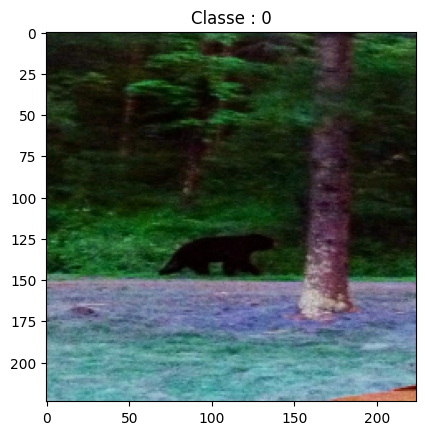

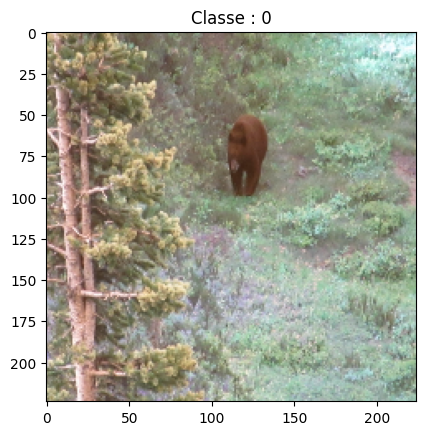

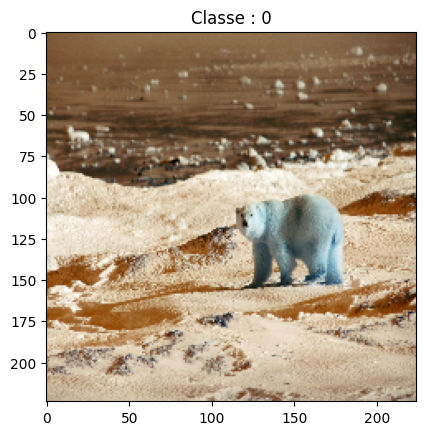

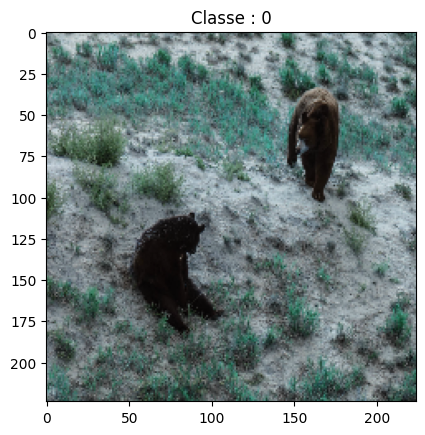

In [11]:
# Printing the image data with its corresponding class label
for i in range(4):
    plt.imshow(X_data[i])
    plt.title(f"Classe : {Y_labels[i]}")
    plt.show()

In [12]:
# Creating the base model of the MobileNet CNN architecture
base_model = MobileNet(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3))

17225924/17225924 [==============================] - 0s 0us/step


In [13]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(labels), activation='softmax')(x)

In [14]:
model = Model(inputs=base_model.input, outputs=predictions)

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Converting the categorical labels to numerical values
Y_onehotEncoder = to_categorical(Y_labels)
Y_valid_onehotEncoder = to_categorical(Y_valid_labels)

In [17]:
# Training the model using epochs
history = model.fit(X_data, Y_onehotEncoder, epochs=20, validation_data=(X_valid_data, Y_valid_onehotEncoder ))

Epoch 1/20
356/356 [==============================] - 65s 126ms/step - loss: 1.8635 - accuracy: 0.4942 - val_loss: 4.4688 - val_accuracy: 0.1562
Epoch 2/20
356/356 [==============================] - 43s 122ms/step - loss: 1.2160 - accuracy: 0.6483 - val_loss: 2.5346 - val_accuracy: 0.3750
Epoch 3/20
356/356 [==============================] - 46s 128ms/step - loss: 0.9699 - accuracy: 0.7042 - val_loss: 1.6188 - val_accuracy: 0.5505
Epoch 4/20
356/356 [==============================] - 43s 120ms/step - loss: 0.7572 - accuracy: 0.7639 - val_loss: 2.9280 - val_accuracy: 0.4028
Epoch 5/20
356/356 [==============================] - 43s 121ms/step - loss: 0.6679 - accuracy: 0.7885 - val_loss: 1.8336 - val_accuracy: 0.5487
Epoch 6/20
356/356 [==============================] - 43s 120ms/step - loss: 0.6366 - accuracy: 0.7975 - val_loss: 2.1033 - val_accuracy: 0.5492
Epoch 7/20
356/356 [==============================] - 44s 124ms/step - loss: 0.4956 - accuracy: 0.8355 - val_loss: 2.0659 - val_ac

In [18]:
# Predicting the class labels for the validation dataset
Y_prediction = model.predict(X_valid_data)
Y_predtiction_classes = np.argmax(Y_prediction, axis=1)

122/122 [==============================] - 4s 31ms/step


In [19]:
# Calculating the accuracy score
AccuracyScore = accuracy_score(Y_valid_labels, Y_predtiction_classes)
print("Score of precision:", AccuracyScore) # Pringting the accuracy score
print("Accuracy Score: {:.2f}%".format(AccuracyScore*100))

Score of precision: 0.6046750577960441
Accuracy Score: 60.47%


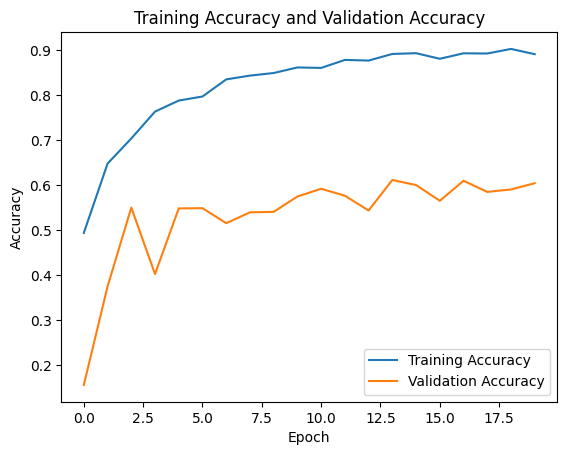

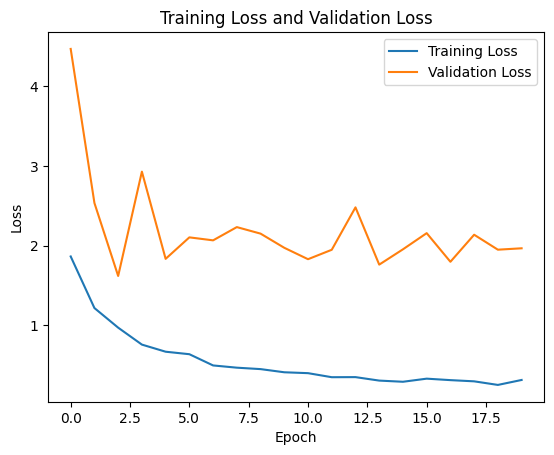

In [20]:
# Printing the graph between training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Printing the graph between training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

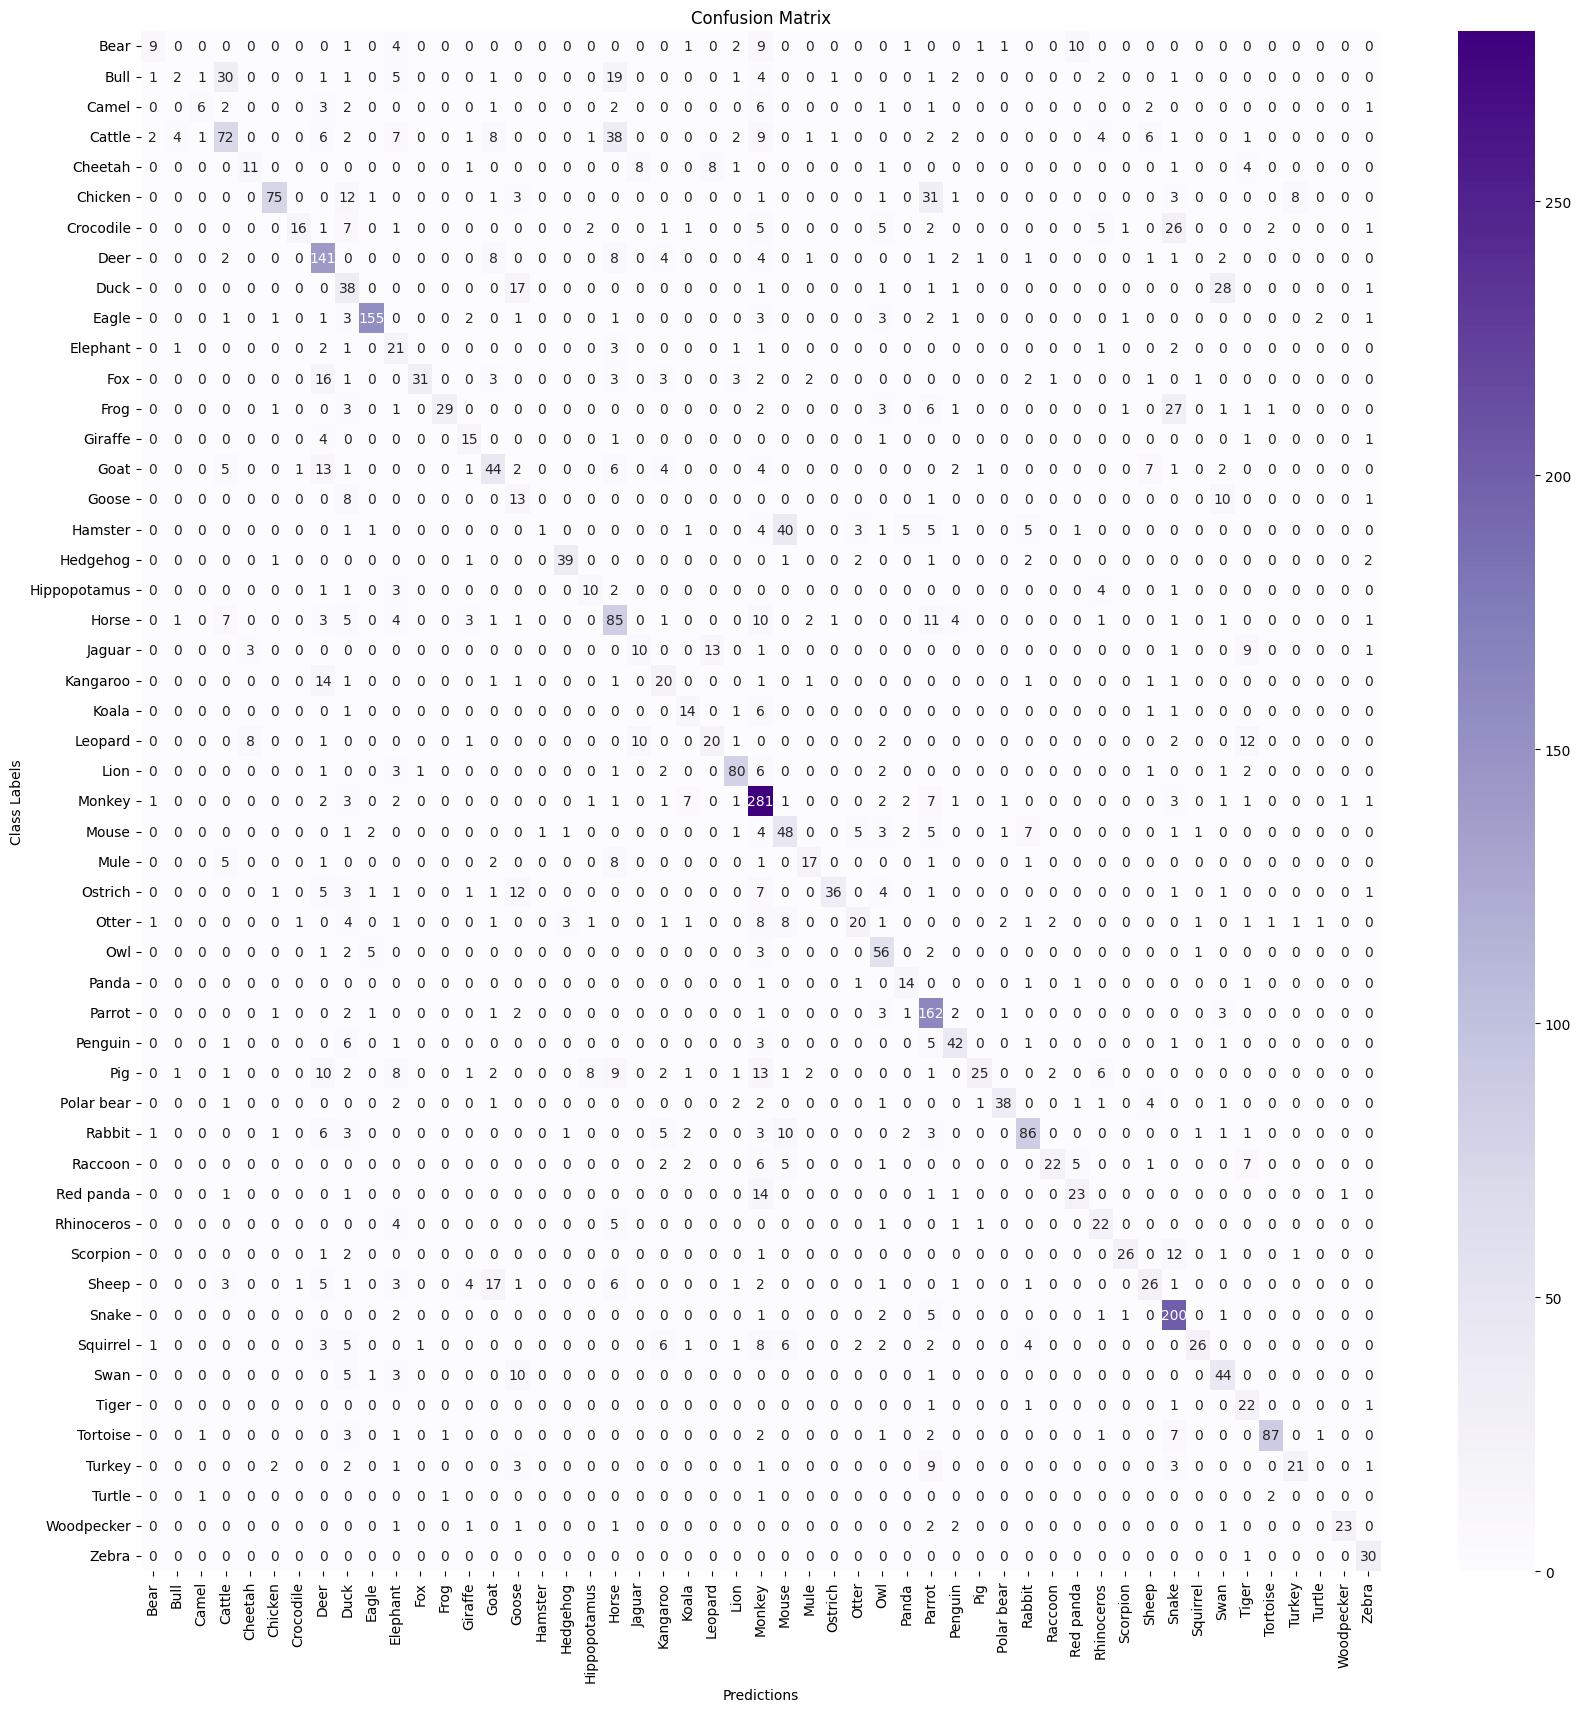

In [21]:
# Creating confusion matrix
ConfusionMatrix = confusion_matrix(Y_valid_labels, Y_predtiction_classes)
# Printing the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(ConfusionMatrix, annot=True, fmt="d", cmap="Purples", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Class Labels')
plt.show()

In [22]:
# Saving the model
model.save('MobileNet_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
